In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score 

### Define the following functions as per the description, so that they can be called later to perform the tasks.

In [2]:
# Remove correlated features

def remove_corelated_features(X_train,val):
    """ Function to remove the correlated features
    
    This function accepts the dataframe X_train,val which creates a correlation matix and removes 
    the correlated features based on certain threshold.
    
    Keyword arguments:
    X_train - Pandas dataframe which contains the independent features.
    val - Certain threshold value by which correlated features to be dropped.
    to_drop - Columns to be dropped
    
    """
    
    
    
    
    return X_train.drop(to_drop,axis=1)



In [3]:
# check the distribution of the passed features
    
def cal_eval_metric(y_test, y_pred, metric):
    """  Check the distribution of the passed features
    
    This function will check for the metric passed(accuracy/precision/recall/f1) 
    and return the required value.
    
    Keyword Arguments:   
    y_test: actual target values
    y_pred: predicted target values
    metric: the metric to be calculated
    
    Return:
    score - Calculated Evaluation Score
    
    """
    
    
    
    return score


### Read the dataset. Take a look at the dataset. 

* Check the data types present in the dataframe.
* Call the num_and_cat_columns() with train as the parameter and store the results.
* Are there any missing values? Are there any Outliers? How do you want to treat them?


In [4]:
# Code starts here
data_train=pd.read_csv('/users/neha/Desktop/Pragra/Grey_Atom_Tasks/Sprint_7/Lending_loan/train.csv')


In [5]:
data_train.head()

,Id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,0,27000.0,27000.0,1,141,805.68,6,100315,4,120000.0,2,2,37697,747,4,16.33,0.0,1.0,14.0,0.0,20928.0,798,26.0,0.0,0.0,0.0,24502.20,0.0,0.0,0.0,48614.0,27900.0,0
1,1,15000.0,15000.0,0,77,551.36,3,94083,0,100000.0,1,2,7157,384,33,19.00,0.0,1.0,16.0,0.0,11051.0,688,20.0,0.0,0.0,0.0,838.69,0.0,0.0,0.0,47703.0,17000.0,0
2,2,7000.0,7000.0,0,8,222.28,0,64843,0,48000.0,0,2,8118,717,3,15.38,0.0,1.0,8.0,0.0,3579.0,172,18.0,0.0,0.0,0.0,5097.27,0.0,0.0,0.0,138287.0,19500.0,0
3,3,18950.0,18950.0,0,38,648.50,1,54947,4,54000.0,2,2,11576,627,41,28.22,0.0,0.0,7.0,0.0,35801.0,894,20.0,0.0,0.0,0.0,4407.62,0.0,0.0,0.0,75286.0,42800.0,0
4,4,35000.0,35000.0,1,108,976.04,4,56326,0,87000.0,2,1,8342,468,46,18.94,0.0,5.0,15.0,0.0,25391.0,506,29.0,0.0,0.0,0.0,17284.95,0.0,0.0,0.0,213561.0,52000.0,0


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131728 entries, 0 to 131727
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Id                          131728 non-null  int64  
 1   loan_amnt                   131728 non-null  float64
 2   funded_amnt                 131728 non-null  float64
 3   term                        131728 non-null  int64  
 4   int_rate                    131728 non-null  int64  
 5   installment                 131728 non-null  float64
 6   grade                       131728 non-null  int64  
 7   emp_title                   131728 non-null  int64  
 8   home_ownership              131728 non-null  int64  
 9   annual_inc                  131728 non-null  float64
 10  verification_status         131728 non-null  int64  
 11  purpose                     131728 non-null  int64  
 12  title                       131728 non-null  int64  
 13  zip_code      

In [7]:
data_train.corr()

,Id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
Id,1.000000,-0.002379,-0.002312,-0.005599,-0.003878,-0.001073,-0.004068,-0.005159,-0.006878,-0.001137,0.000387,-0.002387,0.000242,-0.001675,-0.001197,-0.005300,-0.001299,-0.001118,-0.001470,0.000031,-0.004606,-0.001522,-0.003159,0.001324,0.000368,0.000802,0.000835,-0.004302,-0.001182,0.001368,0.001661,-0.001789,-0.003201
loan_amnt,-0.002379,1.000000,0.999805,0.442021,0.200697,0.954859,0.192328,-0.039449,-0.205167,0.381209,0.390365,-0.134007,-0.105381,-0.014300,0.020079,0.045563,0.009524,0.020846,0.191548,-0.075058,0.308800,0.084360,0.236586,0.080740,0.188464,0.156256,0.431530,-0.006562,0.009149,-0.019545,0.290420,0.217382,0.057871
funded_amnt,-0.002312,0.999805,1.000000,0.441768,0.200497,0.955095,0.192052,-0.039379,-0.205193,0.381185,0.390238,-0.134219,-0.105363,-0.014303,0.020018,0.045580,0.009560,0.020807,0.191534,-0.075011,0.308810,0.084311,0.236561,0.080799,0.188404,0.156256,0.431615,-0.006548,0.009165,-0.019549,0.290479,0.217433,0.057723
term,-0.005599,0.442021,0.441768,1.000000,0.479770,0.200336,0.465309,-0.015597,-0.127125,0.087443,0.374622,-0.024420,-0.030012,-0.037419,0.032230,0.082802,0.008722,0.040399,0.075075,-0.017467,0.097116,0.062873,0.107465,0.054516,0.187477,0.161974,0.275367,0.002883,0.011533,-0.005736,0.115360,0.052454,0.151116
int_rate,-0.003878,0.200697,0.200497,0.479770,1.000000,0.179148,0.972780,0.014888,0.096994,-0.009982,0.225314,0.172023,0.025613,-0.014268,0.011270,0.133727,0.093532,0.248077,0.021168,0.048974,-0.001118,0.304043,-0.008631,0.083081,0.188563,0.144610,0.135151,0.040595,0.035966,0.008973,-0.108671,-0.116316,0.211112
installment,-0.001073,0.954859,0.955095,0.200336,0.179148,1.000000,0.172597,-0.035509,-0.164611,0.380376,0.333352,-0.123066,-0.102347,-0.005093,0.012872,0.040798,0.021416,0.041095,0.187172,-0.066595,0.299503,0.112101,0.219959,0.080220,0.161871,0.129436,0.385639,-0.002588,0.011734,-0.017587,0.256486,0.199357,0.039051
grade,-0.004068,0.192328,0.192052,0.465309,0.972780,0.172597,1.000000,0.014668,0.097038,-0.012463,0.216758,0.166266,0.024997,-0.015053,0.011126,0.127661,0.093549,0.238667,0.018763,0.049112,-0.003660,0.301294,-0.010860,0.082415,0.183368,0.139540,0.130444,0.039516,0.033018,0.008684,-0.109213,-0.117372,0.206929
emp_title,-0.005159,-0.039449,-0.039379,-0.015597,0.014888,-0.035509,0.014668,1.000000,0.004335,-0.047917,0.026492,0.014924,0.193089,-0.008423,0.010993,0.011136,-0.004049,0.004470,-0.035180,0.026018,-0.021012,-0.005488,-0.030496,0.004095,0.005619,0.004568,-0.038006,0.001465,0.001964,0.002341,-0.035559,-0.016390,0.031085
home_ownership,-0.006878,-0.205167,-0.205193,-0.127125,0.096994,-0.164611,0.097038,0.004335,1.000000,-0.201939,-0.146058,0.047026,0.005622,0.006644,-0.075686,0.003215,-0.056481,-0.092567,-0.146930,-0.001819,-0.153456,0.009567,-0.248325,-0.004449,-0.020647,-0.029893,-0.125144,-0.000766,-0.013603,-0.006401,-0.493815,-0.116856,0.039710
annual_inc,-0.001137,0.381209,0.381185,0.087443,-0.009982,0.380376,-0.012463,-0.047917,-0.201939,1.000000,0.116252,0.015943,-0.071990,-0.021386,-0.002259,-0.202384,0.072358,0.090276,0.168212,-0.023584,0.319943,0.025239,0.248347,0.033744,0.035492,0.031227,0.197995,0.005407,0.014077,-0.003043,0.456210,0.246819,-0.052579


In [8]:
data_train.shape

(131728, 33)

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data and apply some data preprocessing techniques

<AxesSubplot:>

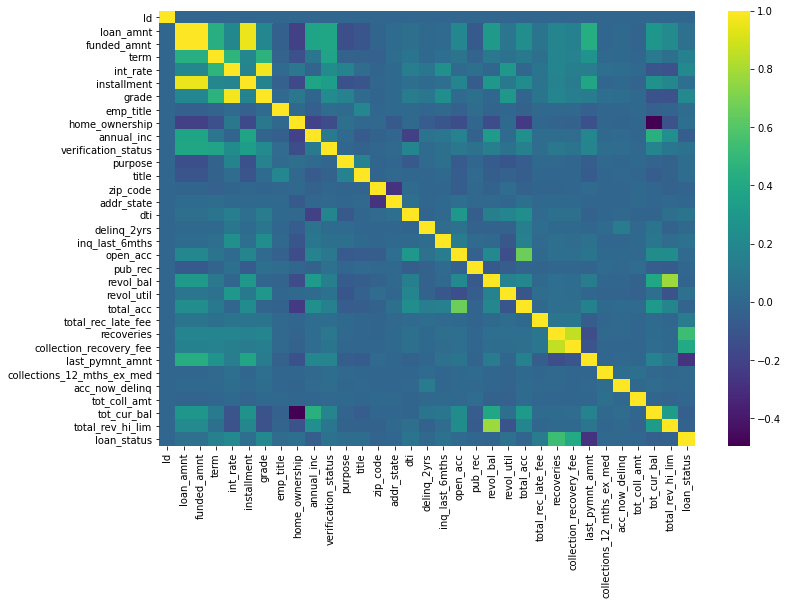

In [9]:
# Code starts here

plt.figure(figsize=(12,8))
sns.heatmap(data_train.corr(), cmap='viridis')



# Code ends here

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Total Compensation`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score.



In [10]:
data_train.drop(['Id','zip_code', 'emp_title'],1, inplace= True)

In [11]:
X=data_train.drop(['loan_status'],axis=1)
y=data_train['loan_status'].copy()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Code starts here
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print("Accuracy Score before feature sellection:", acc)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("=="*20)
r2= r2_score(y_test,y_pred)
print("R2 Score for Logistic Regression is:",r2)
# Code ends here

Accuracy Score before feature sellection: 0.9559705458134062
Confusion Matrix: 
 [[22161    19]
 [ 1141  3025]]
R2 Score for Logistic Regression is: 0.669256080071098


In [14]:
model1 = RandomForestClassifier(n_estimators=100,random_state=8,n_jobs=4)
rfe2 = RFE(model1, 42)
X_train_rfe = rfe2.fit_transform(X_train, y_train)
X_test_rfe = rfe2.transform(X_test)
model1.fit(X_train_rfe,y_train)
y_pred_rfe = model1.predict(X_test_rfe)
print(accuracy_score(y_test,y_pred_rfe))
r2= r2_score(y_test,y_pred_rfe)
print("R2 Score for Random Forest Classifier is:",r2)


0.9895240264176726
R2 Score for Random Forest Classifier is: 0.9213057569824337


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [17]:
# Code starts here


data_test=pd.read_csv('/users/neha/Desktop/Pragra/Grey_Atom_Tasks/Sprint_7/Lending_loan/test.csv')

# Storing the id from the test file
id_ = data_test['Id']
# Dropping the same columns from the test data
data_test.drop(['Id','zip_code', 'emp_title'],1,inplace=True)
# Applying rfe on test data
test_rfe = rfe2.transform(data_test)
# Predict on the test data
y_pred_test = model1.predict(test_rfe)
# Create a sample submission file
final_submission = pd.DataFrame({'Id':id_,'loan_status':y_pred_test})
# Convert the sample submission file into a csv file
final_submission.to_csv('final_submission.csv',index=False)


# Code ends here